In [1]:
%matplotlib inline
from pyhots.POKERDVS import POKERDVS
from spike_data_augmentation.datasets.dataloader import Dataloader
import spike_data_augmentation.transforms as transforms
from pyhots.Network import Network


In [2]:
transform = transforms.Compose([transforms.DropEvent(drop_probability=0.0),
                                ])

testset = POKERDVS(file_dir='/home/gregorlenz/Development/Github/HOTS-DOJO/Datasets/Cards/usable/pips',
                   transform=transform)

Read 3136 events of type dvs from cl_60_td.dat
Read 2695 events of type dvs from cl_61_td.dat
Read 2628 events of type dvs from cl_62_td.dat
Read 2076 events of type dvs from cl_63_td.dat
Read 2234 events of type dvs from cl_64_td.dat
Read 2515 events of type dvs from cl_65_td.dat
Read 2637 events of type dvs from cl_66_td.dat
Read 3439 events of type dvs from cl_67_td.dat
Read 1843 events of type dvs from cl_68_td.dat
Read 2549 events of type dvs from cl_69_td.dat
Read 1785 events of type dvs from cl_70_td.dat
Read 3072 events of type dvs from cl_71_td.dat
Read 3773 events of type dvs from cl_72_td.dat
Read 2374 events of type dvs from cl_73_td.dat
Read 3585 events of type dvs from cl_74_td.dat
Read 3557 events of type dvs from cl_75_td.dat
Read 2769 events of type dvs from di_17_td.dat
Read 4316 events of type dvs from di_18_td.dat
Read 4239 events of type dvs from di_19_td.dat
Read 4083 events of type dvs from di_20_td.dat
Read 3969 events of type dvs from di_21_td.dat
Read 2358 eve

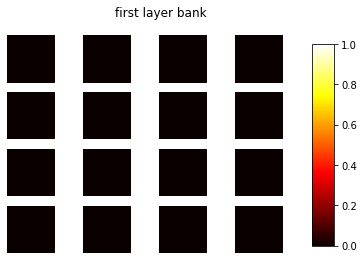

added new base 1/16
added new base 2/16
added new base 3/16
added new base 4/16
added new base 5/16
added new base 6/16
added new base 7/16
added new base 8/16
added new base 9/16
added new base 10/16
added new base 11/16
added new base 12/16
added new base 13/16
added new base 14/16
added new base 15/16
added new base 16/16


In [5]:
surface_dimensions = [(11, 11)]
number_of_features = [16]
time_constants = [5e3]
total_number_of_events = testset.total_number_of_events()

net = Network(surface_dimensions_per_layer=surface_dimensions,
              number_of_features_per_layer=number_of_features,
              time_constants_per_layer=time_constants,
              sensor_size=POKERDVS.sensor_size,
              plot_evolution=True,
              total_number_of_events=total_number_of_events,
              reboot_bases=False,
              merge_polarities=True,)
              #drop_off_events=False,)

# pick 16 random files and one surface each to initialise bases
testloader = Dataloader(testset, shuffle=True)
for index, events_and_label in enumerate(iter(testloader)):
    net(events_and_label[0], events_and_label[1])
    if index >= number_of_features[0]:
        break

In [6]:
counts = dict(zip(POKERDVS.classes, [0, 0, 0, 0]))
# start the learning
testloader = Dataloader(testset, shuffle=True)
testiterator = iter(testloader)
for events, label in testiterator:
    counts[label] += 1
    net(events, label)
    print('Processed', end='')
    for key, value in counts.items():
        print(' ' + str(value) + ' ' + key + ',', end='')
    print('.')

first = net.layers[0]

Processed 0 cl, 0 he, 1 di, 0 sp,.
Processed 0 cl, 1 he, 1 di, 0 sp,.
Processed 0 cl, 2 he, 1 di, 0 sp,.
Processed 0 cl, 3 he, 1 di, 0 sp,.
Processed 0 cl, 3 he, 2 di, 0 sp,.
Processed 0 cl, 3 he, 2 di, 1 sp,.
Processed 0 cl, 3 he, 3 di, 1 sp,.
Processed 0 cl, 4 he, 3 di, 1 sp,.
Processed 0 cl, 4 he, 3 di, 2 sp,.
Processed 0 cl, 4 he, 3 di, 3 sp,.
Processed 1 cl, 4 he, 3 di, 3 sp,.
Processed 1 cl, 4 he, 4 di, 3 sp,.
Processed 1 cl, 4 he, 5 di, 3 sp,.
Processed 1 cl, 4 he, 5 di, 4 sp,.
Processed 1 cl, 5 he, 5 di, 4 sp,.
Processed 2 cl, 5 he, 5 di, 4 sp,.
Processed 2 cl, 5 he, 6 di, 4 sp,.
Processed 2 cl, 6 he, 6 di, 4 sp,.
Processed 2 cl, 7 he, 6 di, 4 sp,.
Processed 2 cl, 7 he, 6 di, 5 sp,.
Processed 3 cl, 7 he, 6 di, 5 sp,.
Processed 4 cl, 7 he, 6 di, 5 sp,.
Processed 5 cl, 7 he, 6 di, 5 sp,.
Processed 5 cl, 8 he, 6 di, 5 sp,.
Processed 5 cl, 8 he, 7 di, 5 sp,.
Processed 5 cl, 9 he, 7 di, 5 sp,.
Processed 5 cl, 9 he, 7 di, 6 sp,.
Processed 5 cl, 10 he, 7 di, 6 sp,.
Processed 6 cl, 10 

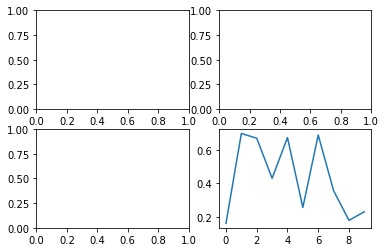

In [16]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
plt.plot(np.random.rand(10))
axis = ax[0]